In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import datetime
import geopandas as gp
from scipy import stats, integrate
import seaborn as sns
#Adjusts what can be displayed when calling a pandas dataframe|
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [2]:
SB_to_Todds = pd.read_csv('data/SirBarton_to_Todds_F.csv')
SB_to_Todds.head()
#SB_to_Todds['Day of week'].unique()

,Day of week,Date,Time,Epoch,Number matches,Travel time (s),Speed (mph)
0,Wednesday,1/1/2014,0:05,1,3,93.7,30.7
1,Wednesday,1/1/2014,0:25,5,2,77.0,37.4
2,Wednesday,1/1/2014,0:35,7,1,65.0,44.3
3,Wednesday,1/1/2014,0:40,8,1,65.0,44.3
4,Wednesday,1/1/2014,0:45,9,1,121.0,23.8


In [3]:
Todds_to_SB = pd.read_csv('data/Todds_to_SirBarton_F.csv')
Todds_to_SB.head()
#Todds_to_SB['Day of week'].unique()

,Day of week,Date,Time,Epoch,Number matches,Travel time (s),Speed (mph)
0,Wednesday,1/1/2014,0:15,3,1,93.0,31.0
1,Wednesday,1/1/2014,0:20,4,1,63.0,45.7
2,Wednesday,1/1/2014,0:25,5,2,83.0,34.7
3,Wednesday,1/1/2014,0:30,6,1,103.0,28.0
4,Wednesday,1/1/2014,0:35,7,1,85.0,33.9


In [4]:
A_to_Rich = pd.read_csv('data/Alumni_to_Richmond_F.csv')
A_to_Rich.head()
#A_to_Rich['Day of week'].unique()

,Day of week,Date,Time,Epoch,Number matches,Travel time (s),Speed (mph)
0,Wednesday,1/1/2014,0:20,4,4,96.0,37.5
1,Wednesday,1/1/2014,0:25,5,2,89.0,40.4
2,Wednesday,1/1/2014,0:30,6,3,100.7,35.8
3,Wednesday,1/1/2014,0:35,7,1,110.0,32.7
4,Wednesday,1/1/2014,0:40,8,2,107.0,33.6


In [5]:
Rich_to_A = pd.read_csv('data/Richmond_to_Alumni_F.csv')
Rich_to_A.head()
#Rich_to_A['Day of week'].unique()

,Day of week,Date,Time,Epoch,Number matches,Travel time (s),Speed (mph)
0,Wednesday,1/1/2014,0:10,2,1,100.0,36.0
1,Wednesday,1/1/2014,0:35,7,3,99.7,36.1
2,Wednesday,1/1/2014,0:40,8,3,113.7,31.7
3,Wednesday,1/1/2014,0:55,11,2,106.0,34.0
4,Wednesday,1/1/2014,1:05,13,2,120.0,30.0


In [6]:
Todds_to_Rich = pd.read_csv('data/Todds_to_Richmond_F.csv')
Todds_to_Rich.head()
#Todds_to_Rich['Day of week'].unique()

,Day of week,Date,Time,Epoch,Number matches,Travel time (s),Speed (mph)
0,Wednesday,1/1/2014,0:05,1,2,120.0,45.0
1,Wednesday,1/1/2014,0:10,2,1,143.0,37.8
2,Wednesday,1/1/2014,0:25,5,2,126.0,42.9
3,Wednesday,1/1/2014,0:35,7,1,231.0,23.4
4,Wednesday,1/1/2014,0:40,8,4,139.0,38.8


In [7]:
Rich_to_Todds = pd.read_csv('data/Richmond_to_Todds_F.csv')
Rich_to_Todds.head()
#Rich_to_Todds['Day of week'].unique()

,Day of week,Date,Time,Epoch,Number matches,Travel time (s),Speed (mph)
0,Wednesday,1/1/2014,0:20,4,1,165.0,32.7
1,Wednesday,1/1/2014,0:25,5,3,147.7,36.6
2,Wednesday,1/1/2014,0:30,6,2,135.0,40.0
3,Wednesday,1/1/2014,0:35,7,2,145.0,37.2
4,Wednesday,1/1/2014,0:50,10,1,165.0,32.7


In [8]:
#x = input dataframe, y = beginning timeframe (in epoch), z = ending timeframe (in epoch), 
#h = holiday (True or False), d = weekend or weekday
#Note the dataframe has to have an EPOCH_5MIN row to work.
#Also, this is ONLY for a single-link dataframe
def timeframeBT(x,y,z,h,d):
    us_holidays = ['1/1/2014', '5/26/2014', 
                   '7/4/2014', '9/1/2014', '11/27/2014', 
                   '11/28/2014', '12/25/2014']
    if h == True:
        r = x[x['Date'].isin(us_holidays)]
        v = x[~x.isin(r)].dropna()
        days = v[v['Day of week'].isin(d)]
        Timeframe = days[(days['Epoch'] >= y) & (days['Epoch'] <= z)]
        return Timeframe
    else:
        days = x[x['Day of week'].isin(d)]
        Timeframe = days[(days['Epoch'] >= y) & (days['Epoch'] <= z)]
        return Timeframe

In [9]:
#For now, enter the weekdays desire here in full
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
Weekday

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [10]:
Weekend = ['Saturday','Sunday']
Weekend

['Saturday', 'Sunday']

In [11]:
Both = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Both

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [29]:
def createcharts(x,startepoch,endepoch,exclude_holidays_bool,DOW):
    Time = timeframeBT(x,startepoch,endepoch,exclude_holidays_bool,DOW)
    #sns.distplot(Time['MEAN'], kde = False, bins = 16)
    if endepoch-startepoch == 288:
        sns.distplot(Time['Epoch'], kde = False, bins = 8)
        sns.jointplot(x="Epoch", y="Speed (mph)", data=Time, size = 8)
    else:
        sns.jointplot(x="Epoch", y="Speed (mph)", data=Time, size = 8)

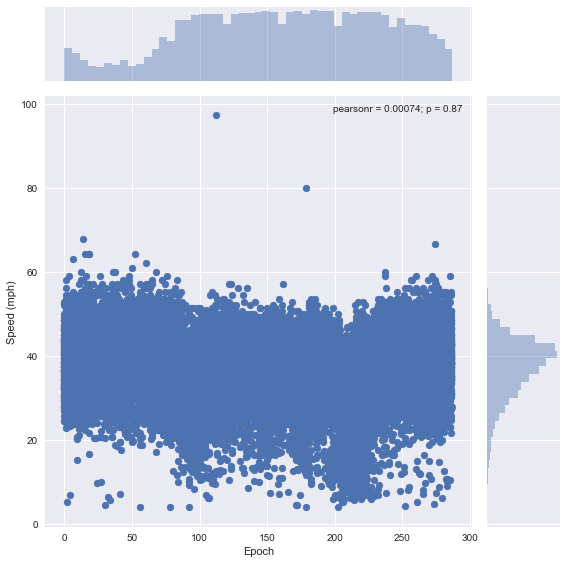

In [22]:
createcharts(Rich_to_A,0,288,True,Weekday)

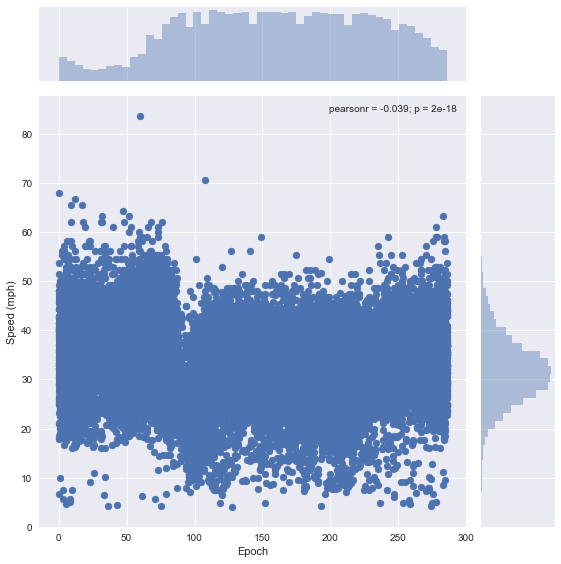

In [23]:
createcharts(A_to_Rich,0,288,True,Weekday)

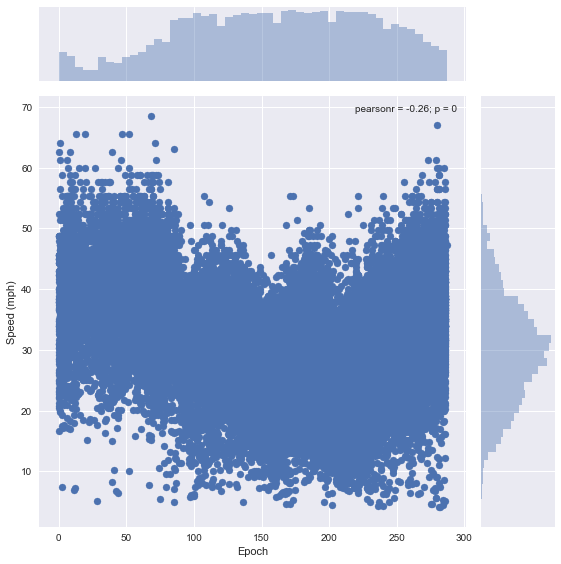

In [24]:
createcharts(SB_to_Todds,0,288,True,Weekday)

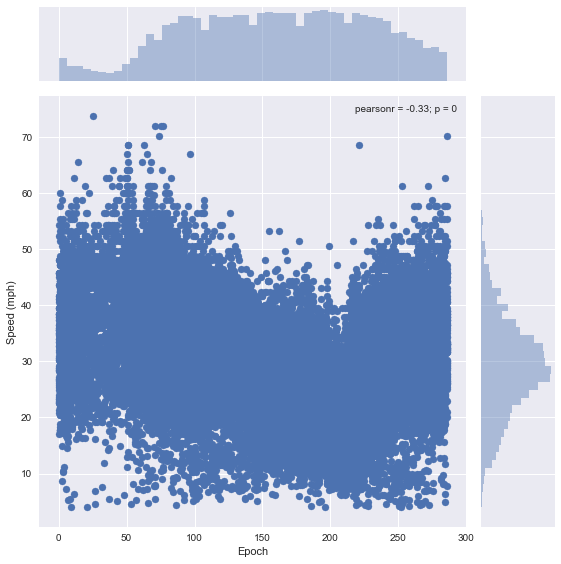

In [25]:
createcharts(Todds_to_SB,0,288,True,Weekday)

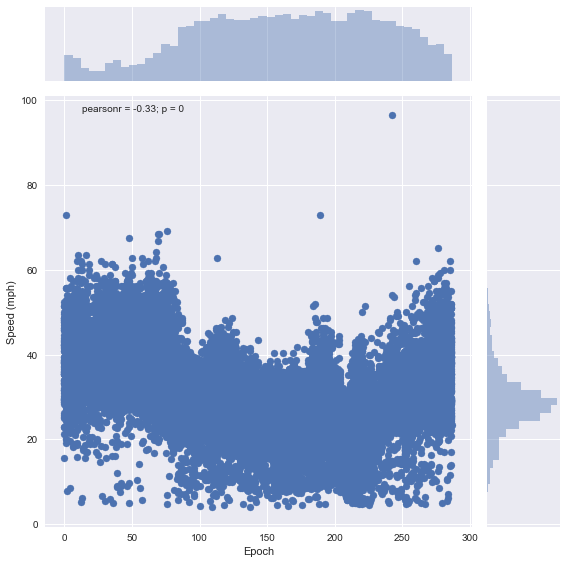

In [26]:
createcharts(Todds_to_Rich,0,288,True,Weekday)

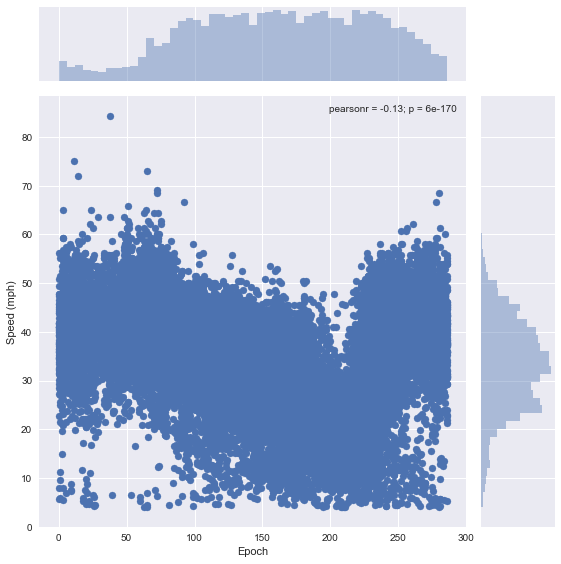

In [28]:
createcharts(Rich_to_Todds,0,288,True,Weekday)